In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('../../Desktop/bikes_rent.csv')

In [4]:
data.shape

(731, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [7]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

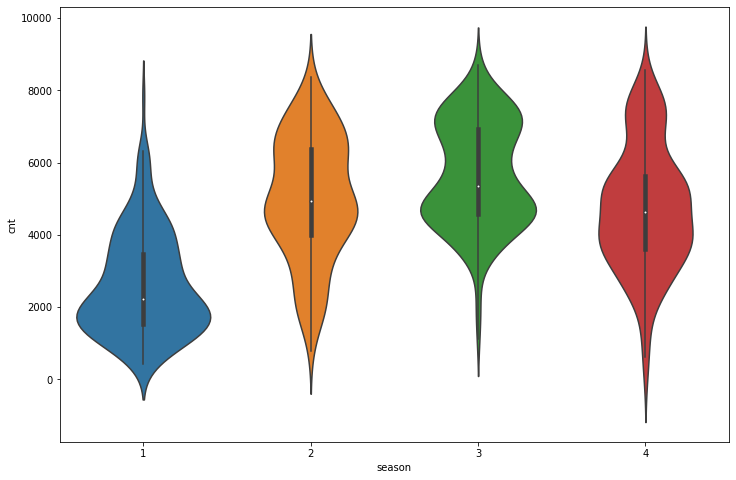

In [11]:
sns.violinplot(data['season'], data['cnt']);

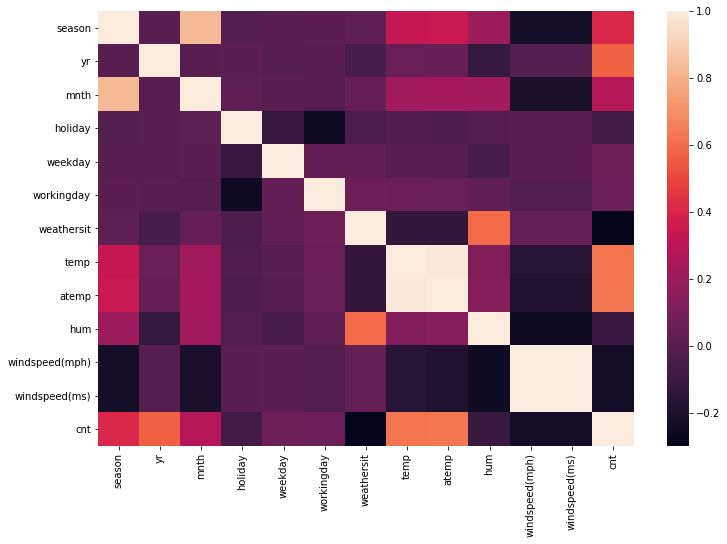

In [12]:
sns.heatmap(data.corr());

In [13]:
data.shape

(731, 13)

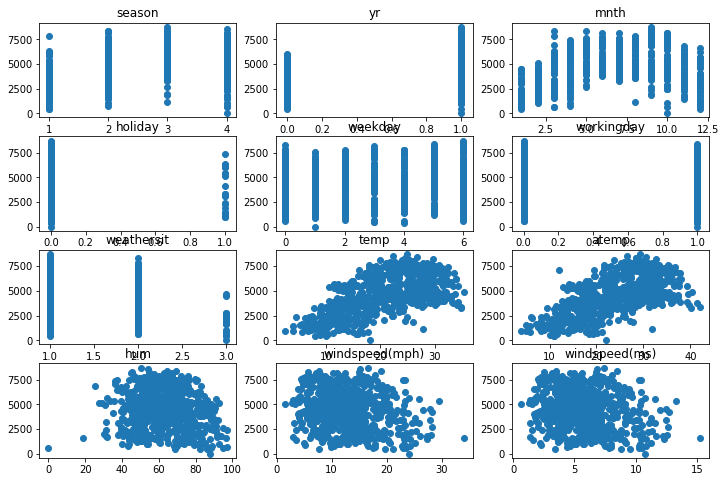

In [17]:
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(4, 3, i +1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

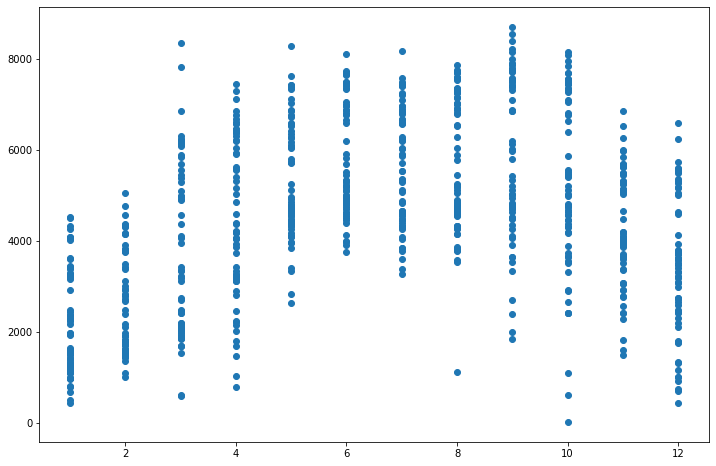

In [18]:
plt.scatter(data.mnth, data.cnt);

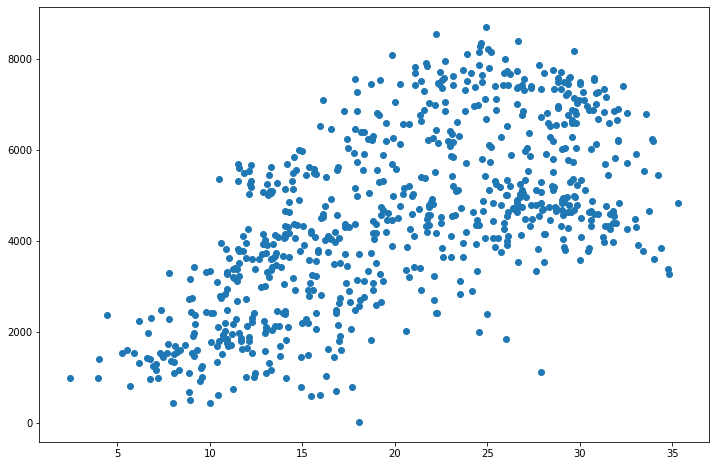

In [19]:
plt.scatter(data.temp, data.cnt);

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [24]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [26]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [27]:
train_part_size = int(.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [29]:
linreg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7946523036094

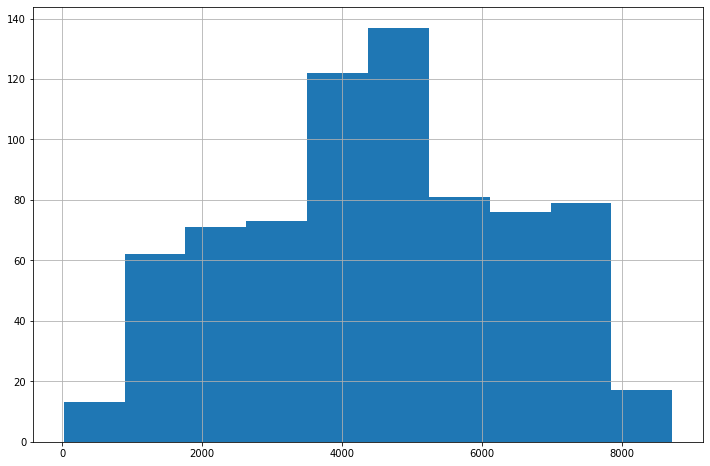

In [32]:
data['cnt'].hist();

In [35]:
pd.DataFrame(linreg.coef_, 
             data.columns[:-1, columns=['coef']).sort_values(by='coef',
                                                             ascending=False)

,coef
windspeed(ms),3.048272e+12
yr,9.540711e+02
atemp,8.911558e+02
season,4.048587e+02
weekday,1.037110e+02
temp,6.250182e+01
mnth,3.080908e+01
workingday,1.470117e+01
holiday,-6.757589e+01
hum,-1.589781e+02


In [57]:
def train_validate_report(model, X_train_scaled, y_train,
                         X_valid_scaled, y_valid, feature_names,
                         forest=False):
    """
    For linear models and regression trees
    """
    model.fit(X_train_scaled, y_train)
    print('MSE=%f' % np.sqrt(mean_squared_error(y_valid, 
                                     model.predict(X_valid_scaled))))
    print('Model coefficients:')
    coef = model.feature_importances_ if forest else model.coef_
    coef_name = 'Importances' if forest else 'Coef'
    
    print(pd.DataFrame(coef, 
            feature_names, columns=[coef_name]).sort_values(by=coef_name,
                                                                 ascending=False))

In [39]:
train_validate_report(lasso, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                      feature_names=data.columns[:-1])

MSE=1120.721409
Model coefficients:
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [47]:
train_validate_report(lasso_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                      feature_names=data.columns[:-1])

MSE=1120.743661
Model coefficients:
                      coef
yr              951.135002
atemp           883.344030
season          403.009581
weekday         101.892690
temp             69.238981
mnth             28.608639
workingday       13.478682
windspeed(ms)    -0.000000
holiday         -66.360460
hum            -156.248289
windspeed(mph) -186.267734
weathersit     -293.016582


In [45]:
lasso_cv.alphas_

array([1.00067072e+03, 9.33228862e+02, 8.70332360e+02, 8.11674872e+02,
       7.56970702e+02, 7.05953410e+02, 6.58374513e+02, 6.14002274e+02,
       5.72620576e+02, 5.34027866e+02, 4.98036175e+02, 4.64470204e+02,
       4.33166466e+02, 4.03972496e+02, 3.76746102e+02, 3.51354676e+02,
       3.27674547e+02, 3.05590379e+02, 2.84994610e+02, 2.65786927e+02,
       2.47873778e+02, 2.31167915e+02, 2.15587971e+02, 2.01058063e+02,
       1.87507423e+02, 1.74870050e+02, 1.63084394e+02, 1.52093052e+02,
       1.41842489e+02, 1.32282780e+02, 1.23367363e+02, 1.15052816e+02,
       1.07298641e+02, 1.00067072e+02, 9.33228862e+01, 8.70332360e+01,
       8.11674872e+01, 7.56970702e+01, 7.05953410e+01, 6.58374513e+01,
       6.14002274e+01, 5.72620576e+01, 5.34027866e+01, 4.98036175e+01,
       4.64470204e+01, 4.33166466e+01, 4.03972496e+01, 3.76746102e+01,
       3.51354676e+01, 3.27674547e+01, 3.05590379e+01, 2.84994610e+01,
       2.65786927e+01, 2.47873778e+01, 2.31167915e+01, 2.15587971e+01,
      

In [48]:
train_validate_report(ridge, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                      feature_names=data.columns[:-1])

MSE=1119.560520
Model coefficients:
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [49]:
train_validate_report(ridge_cv, X_train_scaled, y_train,
                         X_valid_scaled, y_valid,
                      feature_names=data.columns[:-1])

MSE=1118.903543
Model coefficients:
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [66]:
forest = RandomForestRegressor(random_state=17, n_estimators=500)

In [67]:
train_validate_report(forest, X_train, y_train,
                         X_valid, y_valid,
                      feature_names=data.columns[:-1], forest=True)

MSE=1046.960772
Model coefficients:
                Importances
temp               0.298609
atemp              0.243309
yr                 0.199314
hum                0.070565
season             0.062295
weathersit         0.030535
mnth               0.027786
windspeed(mph)     0.020349
weekday            0.019819
windspeed(ms)      0.019613
workingday         0.005191
holiday            0.002615
